### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')


# View the DataFrame.
print(reviews.dtypes)
print(reviews.info())
reviews

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform               

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [4]:
# Any missing values?
reviews_missing = reviews.isnull().sum()

reviews_missing

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [5]:
# Explore the data.
reviews_female = reviews.loc[reviews['gender'] == 'Female']

reviews_female

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
5,Female,24,13.94,76,573,PhD,EN,Web,977,Grandson loves,Five Stars
6,Female,37,14.76,6,61,diploma,EN,Web,979,"I have bought many gm screens over the years, ...",Best gm screen ever
...,...,...,...,...,...,...,...,...,...,...,...
1991,Female,34,16.40,13,142,diploma,EN,Web,466,addicted to this game.,Five Stars
1993,Female,38,84.46,85,5019,graduate,EN,Web,263,Gift,Gift
1994,Female,45,84.46,23,1427,graduate,EN,Web,291,We are retired and find this a great way to st...,A great mind game
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom


In [6]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [7]:
reviews_female.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,38.767857,47.291304,50.691071,1601.166964,4286.818750
std,12.016508,23.004850,24.983196,1251.215501,3150.273237
min,17.000000,12.300000,1.000000,30.000000,107.000000
25%,31.250000,29.725000,34.000000,842.000000,1580.000000
50%,37.000000,46.740000,50.000000,1281.000000,3547.000000
75%,46.000000,63.960000,73.000000,1752.000000,6646.000000
max,70.000000,112.340000,99.000000,6847.000000,11086.000000


In [8]:
# On a whim, wanted to look for differences in behaviour by sex
# More females in the dataset vs males (dataset is 56% female)
# Females are slightly younger (37 vs 38)
# but none of the other numerical columns show a large difference for females only - so will leave it here

## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews1 = reviews.drop(columns=['language', 'platform'])

# View column names.
reviews1.head(0)

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary


## 3. Rename columns

In [10]:
# Rename the column headers.
reviews1.rename(columns = {'remuneration (k£)':'renumeration',
                           'spending_score (1-100)':'spending_score'},
                            inplace = True)


# View column names.
reviews1.head()

,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews1.to_csv('reviews.csv')

In [12]:
# Import new CSV file with Pandas.
reviews_new = pd.read_csv('reviews.csv')

# View DataFrame.
print(reviews_new.shape)
reviews_new.head()

(2000, 10)


,Unnamed: 0,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [13]:
# Independent variable.
x = reviews_new['spending_score']

# Dependent variable.
y = reviews_new['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews_new).fit()

# Print the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        14:20:43   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Extract the estimated parameters.
print('Parameters: ', test.params) 

# Extract the standard errors.
print('Standard errors: ', test.bse)  

# Extract the predicted values.
print('Predicted values: ', test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.061693 * reviews_new['spending_score'] -75.052663 

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

Text(0.5, 0, 'Spending Score')

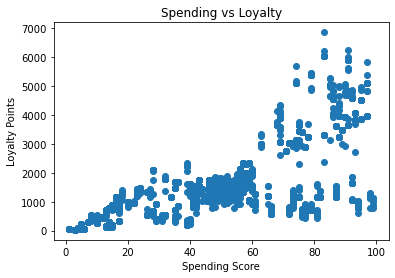

In [81]:
# Plot the graph with a regression line.
plt.scatter(x,y)
plt.title('Spending vs Loyalty')
plt.ylabel('Loyalty Points')
plt.xlabel('Spending Score')

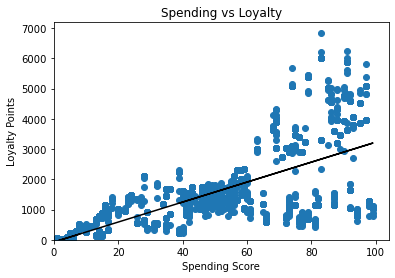

In [82]:
# Plot the graph with a regression line.
plt.scatter(x,y)

# Plot the graph with a regression line.
plt.plot(x,y_pred, color='black')

plt.title('Spending vs Loyalty')
plt.ylabel('Loyalty Points')
plt.xlabel('Spending Score')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5b) renumeration vs loyalty

In [18]:
# Independent variable.
x1 = reviews_new['renumeration']

# Dependent variable.
y1 = reviews_new['loyalty_points']

# OLS model and summary.
f1 = 'y1 ~ x1'
test1 = ols(f1, data = reviews_new).fit()

# Print the regression table
test1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        14:20:43   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x1            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print('Parameters: ', test1.params) 

# Extract the standard errors.
print('Standard errors: ', test1.bse)  

# Extract the predicted values.
print('Predicted values: ', test1.predict())

Parameters:  Intercept   -65.686513
x1           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x1            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [20]:
# Set the the X coefficient and the constant to generate the regression table.
y1_pred = 34.187825 * reviews_new['renumeration'] -65.686513 

# View the output.
y1_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

Text(0.5, 0, 'Renumeration')

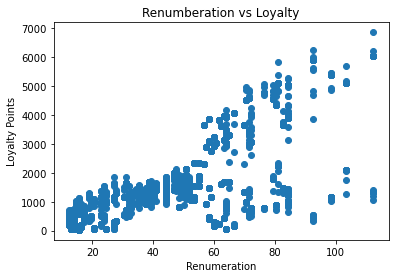

In [84]:
# Plot graph with regression line.
plt.scatter(x1,y1)

plt.title('Renumberation vs Loyalty')
plt.ylabel('Loyalty Points')
plt.xlabel('Renumeration')

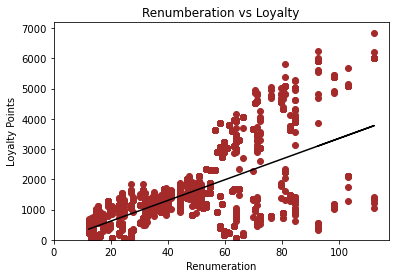

In [90]:
# Plot the graph with a regression line.
plt.scatter(x1,y1, c='brown')

# Plot the graph with a regression line.
plt.plot(x1,y1_pred, color='black')

# Add title and axis labels
plt.title('Renumberation vs Loyalty')
plt.ylabel('Loyalty Points')
plt.xlabel('Renumeration')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)
plt.show()

### 5c) age vs loyalty

In [23]:
# Independent variable.
x2 = reviews_new['age']

# Dependent variable.
y2 = reviews_new['loyalty_points']

# OLS model and summary.
f2 = 'y2 ~ x2'
test2 = ols(f2, data = reviews_new).fit()

# Print the regression table
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 11 Sep 2022   Prob (F-statistic):             0.0577
Time:                        14:20:43   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x2            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Extract the estimated parameters.
print('Parameters: ', test2.params) 

# Extract the standard errors.
print('Standard errors: ', test2.bse)  

# Extract the predicted values.
print('Predicted values: ', test2.predict())

Parameters:  Intercept    1736.517739
x2             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x2            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [25]:
# Set the the X coefficient and the constant to generate the regression table.
y2_pred = -4.012805 * reviews_new['renumeration'] + 1736.517739

# View the output.
y2_pred

0       1687.160237
1       1687.160237
2       1683.869737
3       1683.869737
4       1680.579237
           ...     
1995    1397.596229
1996    1364.691228
1997    1364.691228
1998    1341.657727
1999    1364.691228
Name: renumeration, Length: 2000, dtype: float64

Text(0.5, 0, 'Age')

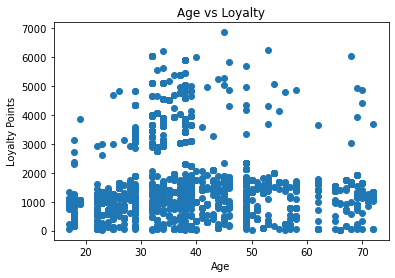

In [91]:
# Plot graph with regression line.
plt.scatter(x2,y2)

# Add title and axis labels
plt.title('Age vs Loyalty')
plt.ylabel('Loyalty Points')
plt.xlabel('Age')

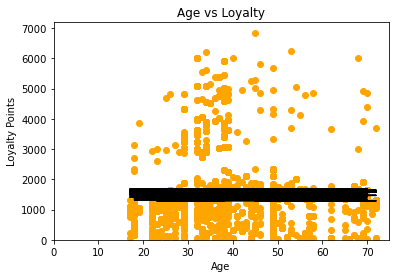

In [93]:
# Plot the graph with a regression line.
plt.scatter(x2,y2, c='orange')

# Add title and axis labels
plt.title('Age vs Loyalty')
plt.ylabel('Loyalty Points')
plt.xlabel('Age')

# Plot the graph with a regression line.
plt.plot(x2,y2_pred, color='black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)
plt.show()

## 6. Observations and insights

***Your observations here...***






Both spending and renumeration seem to have some predictive relationship with loyalty points
R2s for both ~0.40 and intercept values that are relatively small
Looking at the graphs there a higher amount of dispersion as spending / renumeration increases
There appears to be no relationship between loyalty points and age

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [29]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv')

# View DataFrame.
df2.head()

,Unnamed: 0,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [31]:
# Drop unnecessary columns.
df3 = df2[['renumeration', 'spending_score', 'loyalty_points']]

# View DataFrame.
df3

,renumeration,spending_score,loyalty_points
0,12.30,39,210
1,12.30,81,524
2,13.12,6,40
3,13.12,77,562
4,13.94,40,366
...,...,...,...
1995,84.46,69,4031
1996,92.66,8,539
1997,92.66,91,5614
1998,98.40,16,1048


In [32]:
# Explore the data.
print(df3.shape)

df3.dtypes

(2000, 3)


renumeration      float64
spending_score      int64
loyalty_points      int64
dtype: object

In [33]:
# Descriptive statistics.
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
 2   loyalty_points  2000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 47.0 KB
None


## 2. Plot

<AxesSubplot:xlabel='loyalty_points', ylabel='renumeration'>

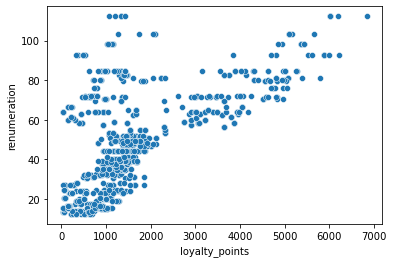

In [34]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='loyalty_points',y='renumeration', data=df3)

<AxesSubplot:xlabel='loyalty_points', ylabel='spending_score'>

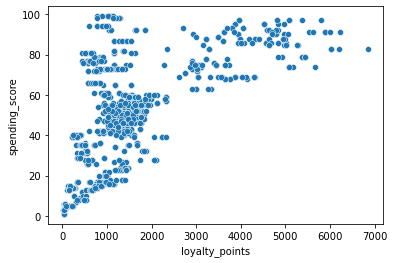

In [35]:
# Create a scatterplot with Seaborn - spending_score
sns.scatterplot(x='loyalty_points', y='spending_score', data=df3)

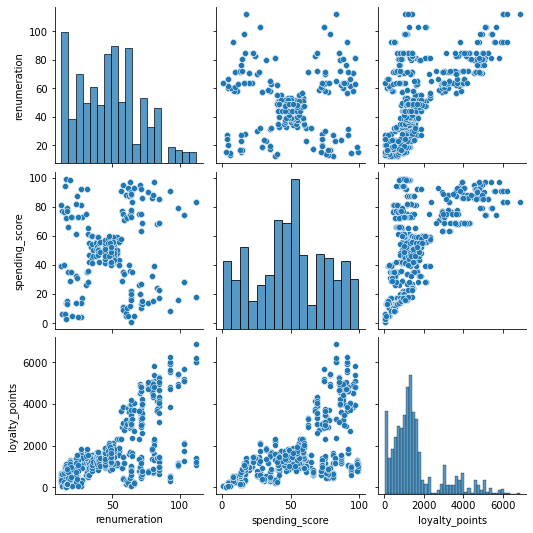

In [36]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)

## 3. Elbow and silhoutte methods

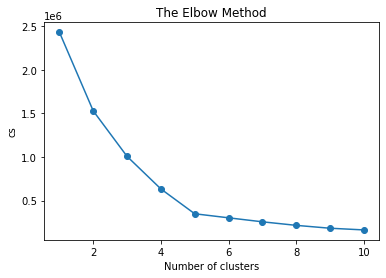

In [37]:
# Determine the number of clusters: Elbow method.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10,
                   random_state = 0)
    kmeans.fit(df3[['renumeration', 'spending_score']])
    cs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('cs')

plt.show()

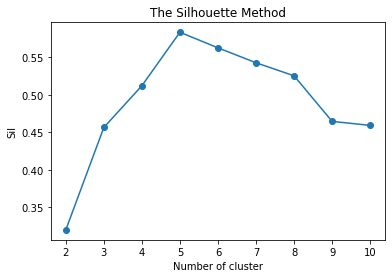

In [38]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10
x5 = df3[['renumeration', 'spending_score']]
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x5)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x5, labels, 
                                metric = 'euclidean'))
    
# Plot the silhouette method
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title('The Silhouette Method')
plt.xlabel('Number of cluster')
plt.ylabel('Sil')

plt.show()

## 4. Evaluate k-means model at different values of *k*

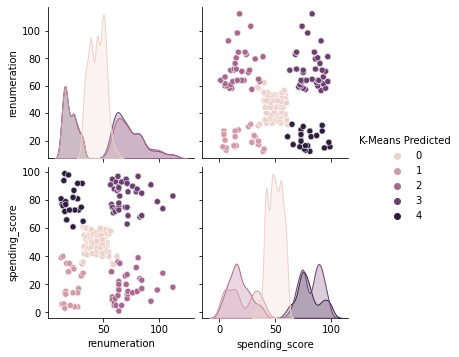

In [94]:
# Evaluating 5 clusters 
kmeans_5 = KMeans(n_clusters = 5, max_iter = 15000, 
                  init='k-means++', random_state=0).fit(x5)
clusters5 = kmeans_5.labels_
x5['K-Means Predicted'] = clusters5

# Plot the predicted
sns.pairplot(x5, hue='K-Means Predicted', diag_kind = 'kde')

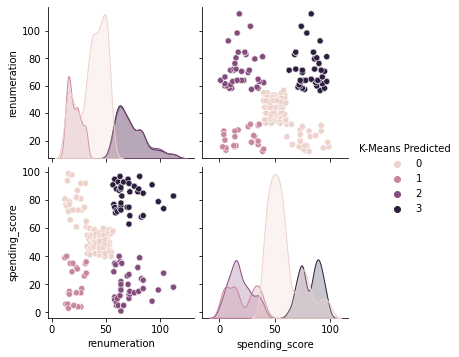

In [40]:
# Evaluating 4 clusters
x4 = df3[['renumeration', 'spending_score']]

kmeans_4 = KMeans(n_clusters = 4, max_iter = 15000, 
                  init='k-means++', random_state=0).fit(x4)
clusters4 = kmeans_4.labels_
x4['K-Means Predicted'] = clusters4

# Plot the predicted
sns.pairplot(x4, hue='K-Means Predicted', diag_kind = 'kde')

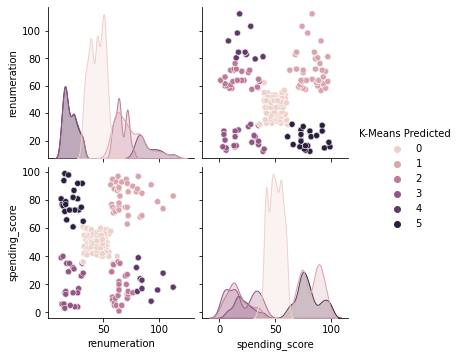

In [41]:
# Evaluating 6 clusters
x6 = df3[['renumeration', 'spending_score']]

kmeans_6 = KMeans(n_clusters = 6, max_iter = 15000, 
                  init='k-means++', random_state=0).fit(x6)
clusters6 = kmeans_6.labels_
x6['K-Means Predicted'] = clusters6

# Plot the predicted
sns.pairplot(x6, hue='K-Means Predicted', diag_kind = 'kde')

## 5. Fit final model and justify your choice

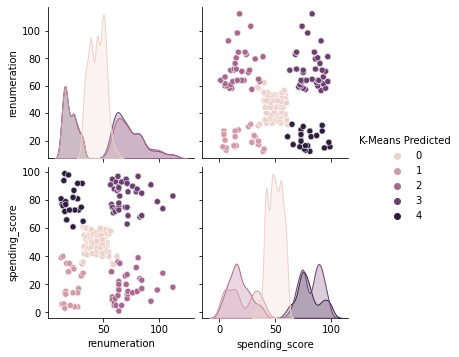

In [42]:
# Apply the final model.
# 5 means seems to give the best fit
# Both the Elbow and Silhouette method suggest this provides the best fit
sns.pairplot(x5, hue='K-Means Predicted', diag_kind = 'kde')

In [43]:
# Check the number of observations per predicted class.
x5['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [96]:
# Visualising the clusters.
# View the DataFrame.
print(x5.head())


   renumeration  spending_score  K-Means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1


Text(0, 0.5, 'Spending')

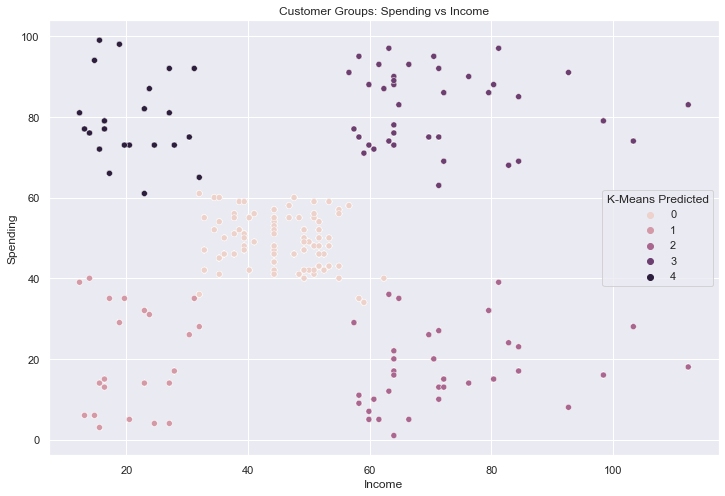

In [100]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize': (12, 8)})

sns.scatterplot(x='renumeration', y='spending_score', data=x5, 
               hue = 'K-Means Predicted')

plt.title('Customer Groups: Spending vs Income')
plt.xlabel('Income')
plt.ylabel('Spending')


## 7. Discuss: Insights and observations

***Your observations here...***

The marketing team at Turtle Games wanted to understand how 'renumeration' and 'spending scores' could be used to better understand segments of their client base.  Using K-Means clustering, we were able to identify there are 5 primary segments of the customer base.  
The marketing team may want to think about how to engage with group 0 (middle earners, middle spenders) and group 2 (high earners, low spenders) as these two groups may represent best opportunities to grow sales for Turtle Games. 

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [46]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import wordcloud
import textblob

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [47]:
# Load the data set as df_w3.
df_w3 = df2 

# View DataFrame.
df_w3

,Unnamed: 0,gender,age,renumeration,spending_score,loyalty_points,education,product,review,summary
0,0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...
1995,1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [48]:
# Explore data set.
print(df_w3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB
None


In [49]:
# Dataframe is 2000 rows by 10 columns
# No missing values as all 10 columns contain 2000 rows with data
# Keep necessary columns. Drop unnecessary columns.
df3_new = df_w3[['review', 'summary']]

# View DataFrame.
df3_new

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [50]:
# Determine if there are any missing values.
print(df3_new.isnull().sum())
df3_new.info()

review     0
summary    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [51]:
# Review: Change all to lower case and join with a space.
df3_new['review'] = df3_new['review'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [52]:
# Summary: Change all to lower case and join with a space.
df3_new['summary'] = df3_new['summary'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [53]:
# Replace all the punctuations in review column.
df3_new['review'] = df3_new['review'].str.replace('[^\w\s]','')

# View output.
df3_new

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fill...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages (with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [54]:
# Replace all the puncuations in summary column.
df3_new['summary'] = df3_new['summary'].str.replace('[^\w\s]','')

# View output.
df3_new

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


### 2c) Drop duplicates in both columns

In [55]:
# Drop duplicates in both columns.
reviews = df3_new.drop_duplicates(subset=['review'])
reviews.reset_index(inplace=True)

# View DataFrame.
print(reviews.shape)
reviews.head()

(1950, 3)


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [56]:
# Create new DataFrame (copy DataFrame).
reviews_new = reviews.copy()

# View DataFrame.
reviews_new.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [57]:
# Apply tokenisation to column review.
reviews_new['review'] = reviews_new['review'].apply(word_tokenize)

# View DataFrame.
reviews_new['review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review, dtype: object

In [58]:
# Review: Create a word cloud.
# Define an empty list of tokens.
review_tokens = []

for i in range(reviews_new.shape[0]):
    review_tokens = review_tokens + reviews_new['review'][i]

# Define an empty string variable for WordCloud.
review_string = ''
for word in review_tokens:
    review_string = review_string + word + ' '
    
print(review_string)                   

when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could h

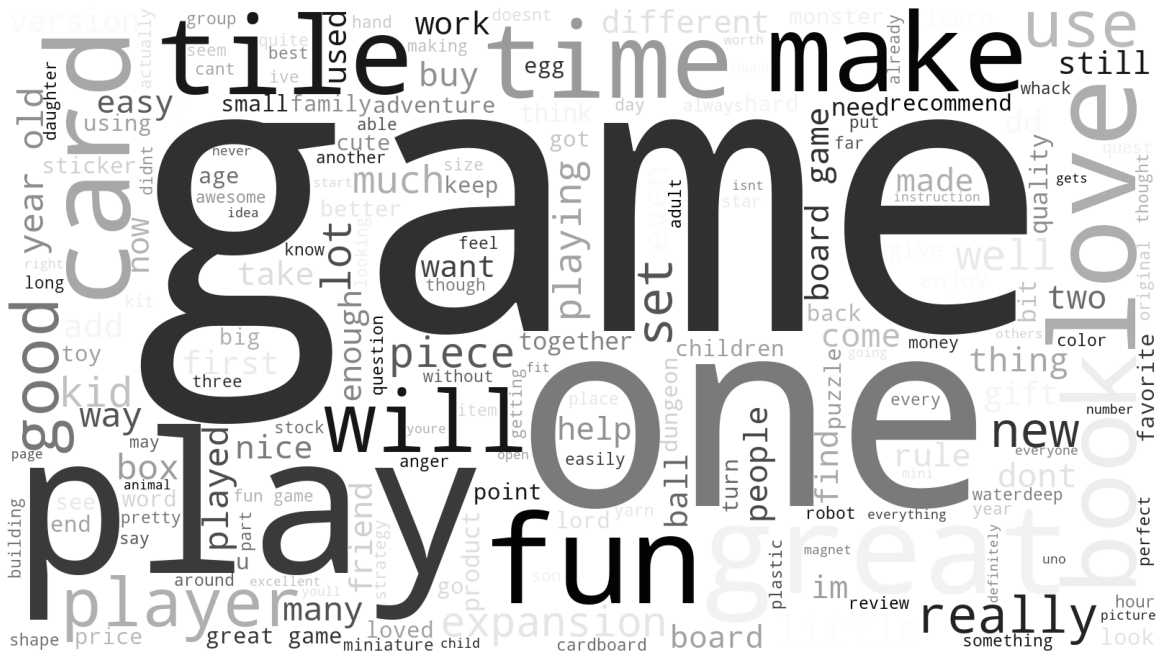

In [59]:
# Review: Plot the WordCloud image.
wordcloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='Greys', 
                min_font_size = 10).generate(review_string)

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [60]:
# Apply tokenisation to column summary.
reviews_new['summary'] = reviews_new['summary'].apply(word_tokenize)

# View DataFrame.
reviews_new['summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary, dtype: object

In [61]:
# Summary: Create a word cloud.
# Define an empty list of tokens.
summary_tokens = []

for i in range(reviews_new.shape[0]):
    summary_tokens = summary_tokens + reviews_new['summary'][i]

# Define an empty string variable for WordCloud.
summary_string = ''
for word in summary_tokens:
    summary_string = summary_string + word + ' '
    
print(summary_string)  

the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a great buy cant wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five stars five

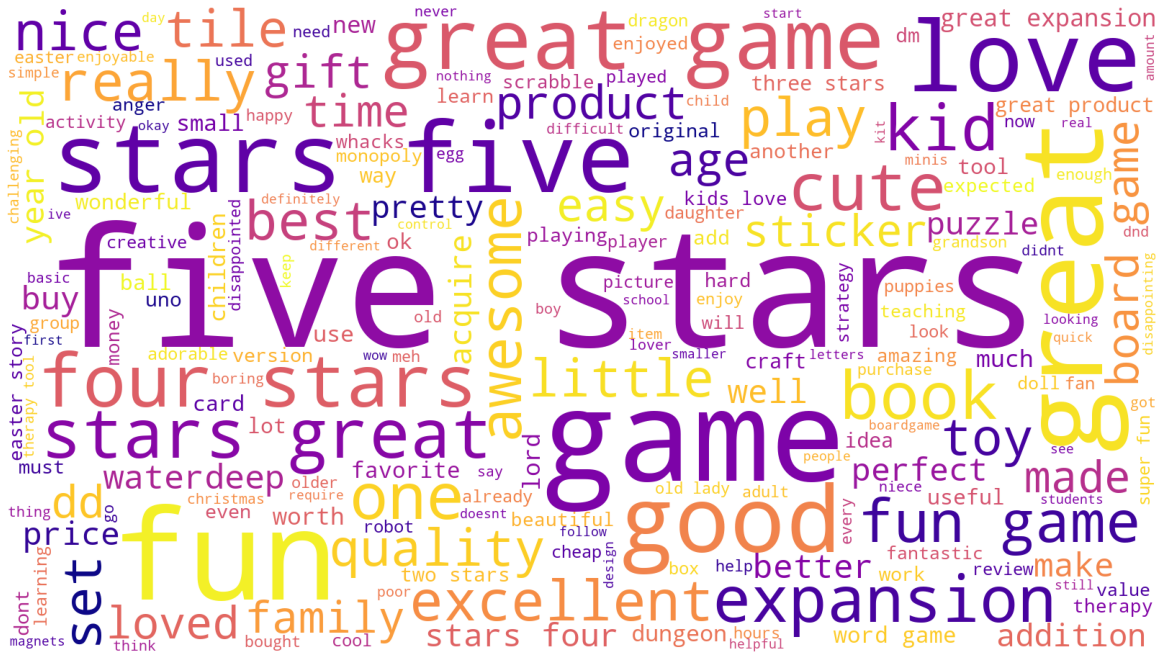

In [62]:
# Summary: Plot the WordCloud image.
wordcloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summary_string)

plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [63]:
# Determine the frequency distribution - reviews
freq_dist_reviews = FreqDist(review_tokens)

# View the reviews data
freq_dist_reviews

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [64]:
# Determine the frequency distribution - reviews
freq_dist_summary = FreqDist(summary_tokens)

# View the reviews data
freq_dist_summary

FreqDist({'stars': 420, 'five': 338, 'game': 319, 'great': 294, 'the': 260, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [65]:
# Delete all the alpanum.
review_tokens_clean = [x for x in review_tokens if x.isalnum()]
summary_tokens_clean = [x for x in summary_tokens if x.isalnum()]

In [66]:
# Remove all the stopwords
# Download stopwords list
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stopwords = set(stopwords.words('english'))

review_tokens_clean = [x for x in review_tokens if x.lower() not in english_stopwords]
summary_tokens_clean = [x for x in summary_tokens if x.lower() not in english_stopwords]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlszabo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4c) Create wordcloud without stopwords

In [67]:
# Create a wordcloud without stop words - review
review_string_clean = ''
for value in review_tokens_clean:
    review_string_clean = review_string_clean + word + ' '

wordcloud_review_clean = WordCloud(width = 1600, height = 900, 
                background_color ='black', 
                colormap='Blues', 
                min_font_size = 10).generate(summary_string)

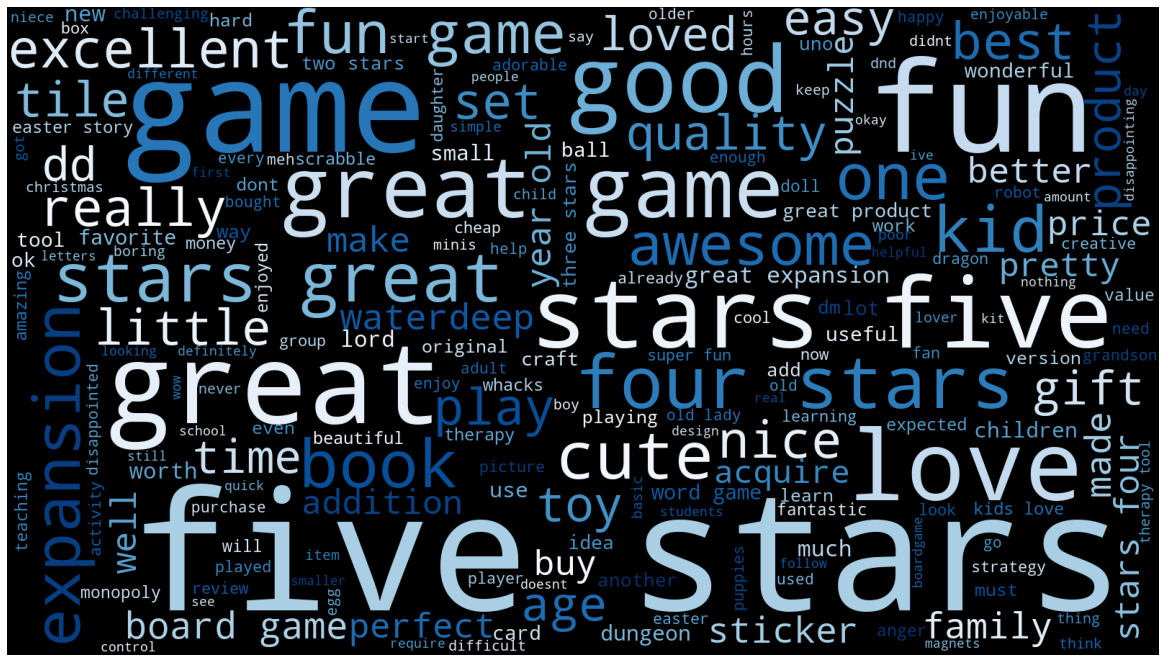

In [68]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review_clean) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [69]:
# Create a wordcloud without stop words - review
summary_string_clean = ''
for value in summary_tokens_clean:
    summary_string_clean = summary_string_clean + value + ' '

wordcloud_summary_clean = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='Greens', 
                min_font_size = 10).generate(summary_string_clean)

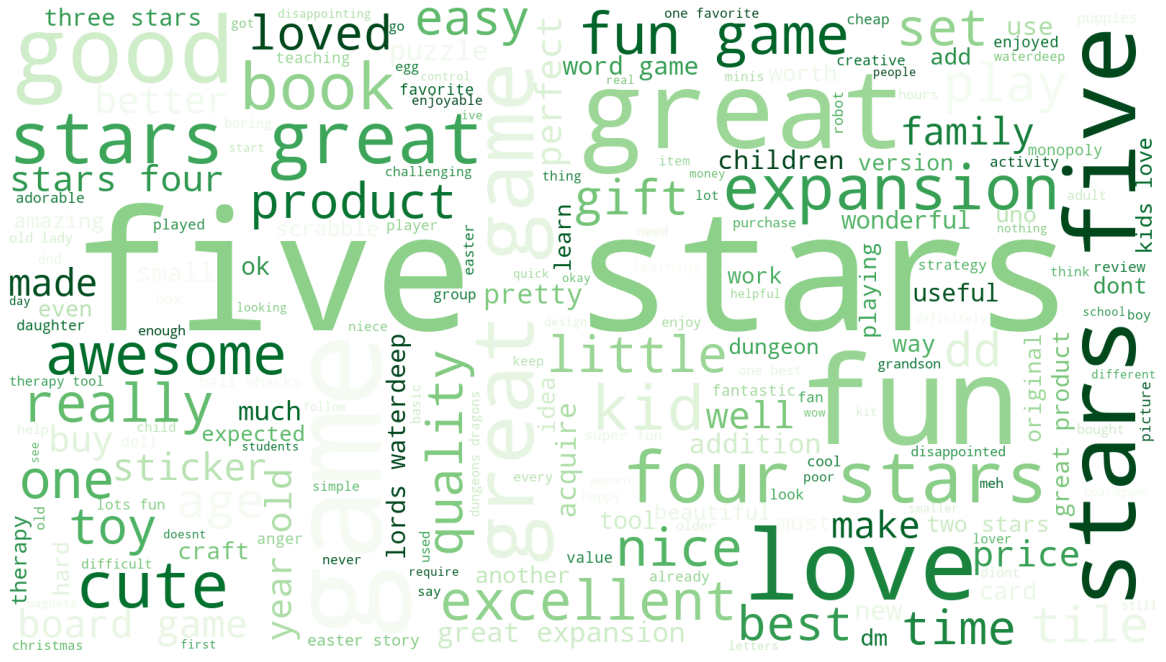

In [70]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary_clean) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [71]:
# Determine the 15 most common words - reviews
review_count = pd.DataFrame(Counter(review_tokens_clean).most_common(15),
                           columns=['Word', 'Frequency']).set_index('Word')

# View the dataframe
review_count

,Frequency
Word,
game,1668
great,579
fun,549
one,530
play,502
like,414
love,322
really,319
get,319


In [72]:
# Determine the 15 most common words - summary
summary_count = pd.DataFrame(Counter(summary_tokens_clean).most_common(15),
                           columns=['Word', 'Frequency']).set_index('Word')

# View the dataframe
summary_count

,Frequency
Word,
stars,420
five,338
game,319
great,294
fun,218
love,92
good,91
four,56
like,54


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [73]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [74]:
# Determine polarity of both columns - review
df3_new['review_polarity'] = df3_new['review'].apply(generate_polarity)
df3_new['summary_polarity'] = df3_new['summary'].apply(generate_polarity)


# View output.
df3_new.head()

,review,summary,review_polarity,summary_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.00


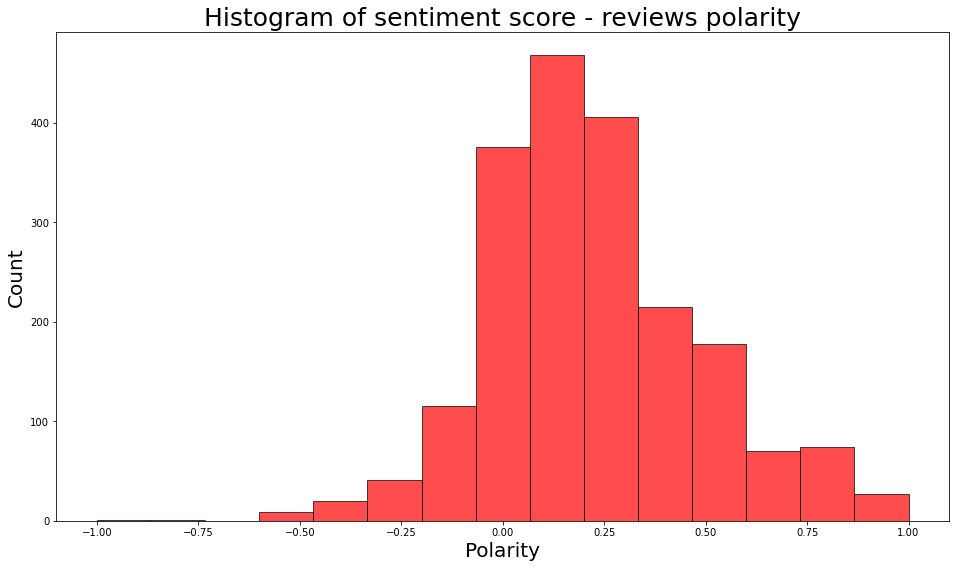

In [75]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15
plt.figure(figsize=(16,9))
plt.hist(df3_new['review_polarity'], num_bins, facecolor='red', edgecolor='black', alpha=0.7)

# Histogram of sentiment score
plt.xlabel('Polarity', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of sentiment score - reviews polarity', fontsize=25)

plt.show()

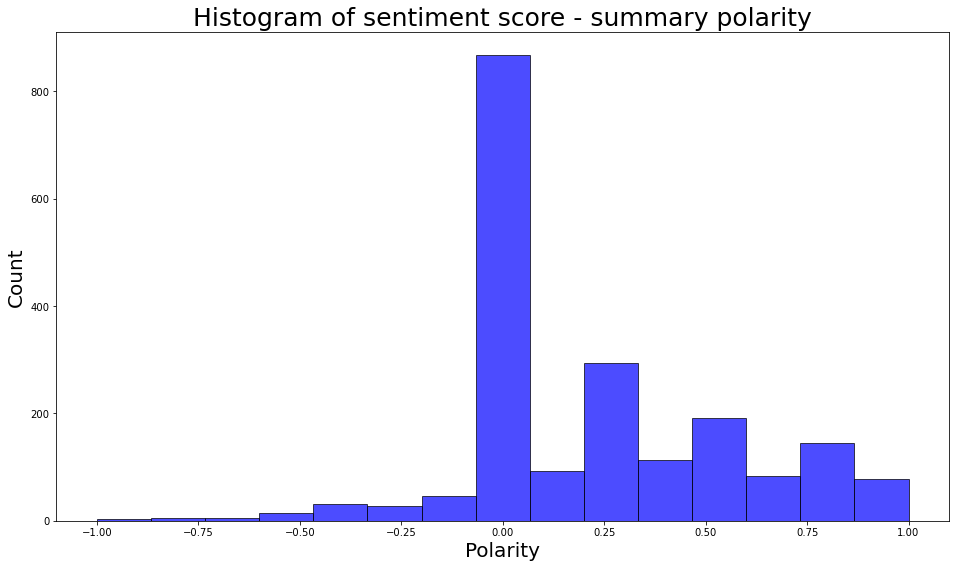

In [76]:
# Summary: Create a histogram plot with bins = 15.
num_bins = 15
plt.figure(figsize=(16,9))
plt.hist(df3_new['summary_polarity'], num_bins, facecolor='blue', edgecolor='black', alpha=0.7)

# Histogram of sentiment score
plt.xlabel('Polarity', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Histogram of sentiment score - summary polarity', fontsize=25)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [77]:
# Top 20 negative reviews.
negative_review = df3_new.nsmallest(20, 'review_polarity')
pd.set_option('display.max_colwidth', 1000) 

# View output.
negative_review[['review', 'review_polarity']]


,review,review_polarity
208,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
364,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
117,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
227,this was a gift for my daughter i found it difficult to use,-0.500000
230,i found the directions difficult,-0.500000
290,instructions are complicated to follow,-0.500000
301,difficult,-0.500000
1524,expensive for what you get,-0.500000


In [78]:
# Top 20 negative summaries
negative_summary = df3_new.nsmallest(20, 'summary_polarity')
pd.set_option('display.max_colwidth', 1000) 

# View output.
negative_summary[['summary', 'summary_polarity']]


,summary,summary_polarity
21,the worst value ive ever seen,-1.000000
208,boring unless you are a craft person which i am,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
144,disappointed,-0.750000
631,disappointed,-0.750000
793,disappointed,-0.750000
1620,disappointed,-0.750000
363,promotes anger instead of teaching calming methods,-0.700000


In [79]:
# Top 20 positive reviews.
positive_reviews = df3_new.nlargest(20, 'review_polarity')
pd.set_option('display.max_colwidth', 1000)

# View output.
positive_reviews[['review', 'review_polarity']]

,review,review_polarity
7,came in perfect condition,1.0
165,awesome book,1.0
194,awesome gift,1.0
496,excellent activity for teaching selfmanagement skills,1.0
524,perfect just what i ordered,1.0
591,wonderful product,1.0
609,delightful product,1.0
621,wonderful for my grandson to learn the resurrection story,1.0
790,perfect,1.0
933,awesome,1.0


In [80]:
# Top 20 positive summaries.
positive_summaries = df3_new.nlargest(20, 'summary_polarity')
pd.set_option('display.max_colwidth', 1000)

# View output.
positive_summaries[['summary', 'summary_polarity']]

,summary,summary_polarity
6,best gm screen ever,1.0
28,wonderful designs,1.0
32,perfect,1.0
80,theyre the perfect size to keep in the car or a diaper,1.0
134,perfect for preschooler,1.0
140,awesome sticker activity for the price,1.0
161,awesome book,1.0
163,he was very happy with his gift,1.0
187,awesome,1.0
210,awesome and welldesigned for 9 year olds,1.0


## 7. Discuss: Insights and observations

***Your observations here...***

Overall, the words skew positive. Looking at the polarity histograms a majority of the reviews measure as either neutral or positive.  The word clouds also indicate a positive sentiment with 'five stars', 'love', and 'fun' amongst the most common words included in reviews. 

The negative reviews seem to center around a game being boring.  Would be curious to further explore if this is related to a single product or type of product? For example, one review talks about how this could be fun for a 'craft person' - does Turtle games offer a line of craft products? These reviews may help inform on how the business wants to take that product line forward or perhaps review if that's an area they would like to continue to participate in.  

# 